In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Размеры выборок
n1 = 100
n2 = 100

# Функции для получения выборок
def gen_x1():
    return np.random.chisquare(15, n1)

def gen_x2():
    return np.random.uniform(5, 25, n2)

# Конкретные выборки
x1, x2 = gen_x1(), gen_x2()

## 1. Выборочные характеристики

**Необходимо**:

1. Описать распределения $X_1$ и $X_2$, найти их МО и дисперсию, указать объём выборок

2. Рассчитать выборочные характеристики: среднее, $s$, $s^2$

3. Рассчитать выборочные характеристики для совокупной выборки $x_1$ + $x_2$

1.

$X_1$ имеет распределение $\chi^2(15)$. Объём выборки: n1 = 100

Теоретические: 

1) мат. ожидание $M[X_1]$ = 15

2) дисперсия $D[X_1]$ = 2 * 15 = 30

$X_2$ имеет распределение $R[5, 25]$. Объём выборки: n2 = 100

Теоретические: 

1) мат. ожидание $M[X_2]$ = (25 + 5) / 2 = 30 / 2 = 15

2) дисперсия $D[X_2]$ = 2 * 15 = (25 - 5) ^ 2 / 12 = 33,(3)

In [3]:
def print_sample_chars(sample):
    print("Среднее {}, s={}, s^2={}".format(
        np.mean(sample),
        np.std(sample),
        np.var(sample)
    ))

print('2.')
print_sample_chars(x1)
print_sample_chars(x2)
print('3.')
pooled = np.concatenate([x1, x2])
print_sample_chars(pooled)

2.
Среднее 14.695061393851022, s=5.711437605867662, s^2=32.62051952571933
Среднее 14.013761851381243, s=5.7638137210311635, s^2=33.22154861074711
3.
Среднее 14.354411622616135, s=5.747788821353443, s^2=33.0370763348756


## 2. Однопараметрические критерии

**Необходимо**:

Для СВ $X_1$ сформулировать гипотезы $H_0$, проверяемые следующими тестами:

1. z-test
2. t-test
3. $\chi^2-test$ ($m$ известно)
4. $\chi^2-test$ ($m$ неизвестно)

Для каждой гипотезы рассчитать выборочное значение статистики критерия, p-value, выбрать уровень значимости $\alpha$ и рассчитать ошибку статистического решения.

Проверим гипотезу $H_0: X_1 \sim \chi^2(17)$ на уровне значимости $\alpha = .05$ с помощью z-test, t-test, $\chi^2-test$ ($m$ известно), $\chi^2-test$ ($m$ неизвестно)

In [4]:
def s_0_2(sample_, mean_):
    n = len(sample_)
    return sum([(xi - mean_) ** 2 for xi in sample_]) / n 

def criterion_z_test(sample):
    m0 = 17
    sigma = 30
    mean = np.mean(sample)
    n = len(sample)
    return (mean - m0) / sigma * np.sqrt(n)

def criterion_t_test(sample):
    s = np.std(sample) # s - оценка с.к.о.
    mean = np.mean(sample) # выборочное среднее
    m0 = 17 # основная гипотеза: МО генеральной совокупности для x2 составляет m0
    n = len(sample)
    return (mean - m0) / s * np.sqrt(n)

def criterion_chi2_m(sample):
    mean = 15
    sigma0_2 = 34
    n = len(sample)
    return n * s_0_2(sample, mean) / sigma0_2

def criterion_chi2_no_m(sample):
    sigma0_2 = 34
    n = len(sample)
    return n * np.var(sample) / sigma0_2

z_test_dist = stats.norm
t_test_dist = stats.t
chi2_test_dist = stats.chi2

### P-value

Рассчёт p-value для право-, лево- и двусторонней альтернативных гипотез:

In [5]:
def left_p_value(dist, criterion_value, *args):
    if not args:
        return dist.cdf(criterion_value)
    return dist.cdf(criterion_value, *args)

def right_p_value(dist, criterion_value, *args):
    return 1 - dist.cdf(criterion_value, *args)

def two_sided_p_value(dist, criterion_value, *args):
    left_p = left_p_value(dist, criterion_value, *args)
    return 2 * min(left_p, 1 - left_p)

In [6]:
alpha = 0.05 # задаёмся уровнем значимости
# z-test
name = 'z-test'
criterion_value = criterion_z_test(x1) # значение статистики критерия для гипотезы H0: m = m0, сигма известна
norm_quantile = z_test_dist.ppf(1 - alpha / 2, 0, 1)  # рассчитываем квантиль стандартоного нормального распределения
critical_value = norm_quantile
print("Значение {} критерия: {}, критическое значение: {}".format(name, abs(criterion_value), critical_value))
is_h0_true = abs(criterion_value) < critical_value
print(f"Согласно критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
p_value = two_sided_p_value(z_test_dist, criterion_value, 0, 1)
print("{} p-value: {}".format(name, p_value))
is_h0_true = p_value > alpha
print(f"Согласно p-value критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
print('\n')




name = 't-test'
criterion_value = criterion_t_test(x1) # значение статистики критерия для гипотезы H0: m = m0, сигма неизвестна
student_quantile = t_test_dist.ppf(1 - alpha / 2, n1 - 1)  # рассчитываем квантиль распределения Стьюдента
critical_value = student_quantile
print("Значение {} критерия: {}, критическое значение: {}".format(name, abs(criterion_value), critical_value))
is_h0_true = abs(criterion_value) < critical_value
print(f"Согласно критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
p_value = two_sided_p_value(t_test_dist, criterion_value, n1 - 1)
print("{} p-value: {}".format(name, p_value))
is_h0_true = p_value > alpha
print(f"Согласно p-value критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
print('\n')



name = 'x^2-test_m'
criterion_value = criterion_chi2_m(x1) # значение статистики критерия для гипотезы H0: s = s0, m известно
chi2_quantile = chi2_test_dist.ppf(1 - alpha, n1)  # рассчитываем квантиль хи-квадрат(n1)
critical_value = chi2_quantile
print("Значение {} критерия: {}, критическое значение: {}".format(name, abs(criterion_value), critical_value))
is_h0_true = criterion_value < critical_value
print(f"Согласно критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
p_value = right_p_value(chi2_test_dist, criterion_value, n1)
print("{} p-value: {}".format(name, p_value))
is_h0_true = p_value > alpha
print(f"Согласно p-value критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
print('\n')




name = 'x^2-test_no_m'
criterion_value = criterion_chi2_no_m(x1) # значение статистики критерия для гипотезы H0: s = s0, m неизвестно
chi2_quantile = chi2_test_dist.ppf(1 - alpha, n1 - 1)  # рассчитываем квантиль хи-квадрат(n1 - 1)
critical_value = chi2_quantile
print("Значение {} критерия: {}, критическое значение: {}".format(name, abs(criterion_value), critical_value))
is_h0_true = criterion_value < critical_value
print(f"Согласно критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
p_value = right_p_value(chi2_test_dist, criterion_value, n1 - 1)
print("{} p-value: {}".format(name, p_value))
is_h0_true = p_value > alpha
print(f"Согласно p-value критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
print('\n')

Значение z-test критерия: 0.768312868716326, критическое значение: 1.959963984540054
Согласно критерию z-test гипотеза H0 принимается
z-test p-value: 0.4423013311288566
Согласно p-value критерию z-test гипотеза H0 принимается


Значение t-test критерия: 4.035654007287049, критическое значение: 1.9842169515086827
Согласно критерию t-test гипотеза H0 отклоняется
t-test p-value: 0.00010735405572845308
Согласно p-value критерию t-test гипотеза H0 отклоняется


Значение x^2-test_m критерия: 96.21619729188062, критическое значение: 124.34211340400407
Согласно критерию x^2-test_m гипотеза H0 принимается
x^2-test_m p-value: 0.5885020318668222
Согласно p-value критерию x^2-test_m гипотеза H0 принимается


Значение x^2-test_no_m критерия: 95.9427044874098, критическое значение: 123.2252214533618
Согласно критерию x^2-test_no_m гипотеза H0 принимается
x^2-test_no_m p-value: 0.5682917321442519
Согласно p-value критерию x^2-test_no_m гипотеза H0 принимается




## 3. Критерии для двух выборок

**Необходимо**:

Выполнить задания пункта 2 для СВ $X_1$ и $X_2$ и следующих тестов:

1. 2-sample t-test $H_0: M[X_1] = M[X_2]$
2. 2-sample F-test (m известно) $H_0: D[X_1] = D[X_2]$
3. 2-sample F-test (m неизвестно) $H_0: D[X_1] = D[X_2]$

In [7]:
def criterion_t2_test(sample1, sample2):
    s1 = np.std(sample1)
    s2 = np.std(sample2)
    n1 = len(sample1)
    n2 = len(sample2)
    S = (n1 - 1) * s1 * s1 + (n2 - 1) * s2 * s2
    S /= n1 + n2 - 2
    
    m1 = np.mean(sample1)
    m2 = np.mean(sample2)
    z = (m1 - m2) / S
    z /= np.sqrt(1.0 / n1 + 1.0 / n2)
    return z

def criterion_f_test_m(sample1, sample2):
    m1 = m2 = 15
    return s_0_2(sample1, m1)/s_0_2(sample2, m2)

def criterion_f_test_no_m(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    var1 = np.var(sample1)
    var2 = np.var(sample2)
    return var1 / var2

t2_test_dist = stats.t
f_test_m = stats.f
f_test_no_m = stats.f

In [8]:
name = '2-sample t-test'
criterion_value = criterion_t2_test(x1, x2)
student_quantile = t2_test_dist.ppf(1 - alpha / 2, len(x1) + len(x2) - 2)
critical_value = student_quantile
print("Значение {} критерия: {}, критическое значение: {}".format(name, abs(criterion_value), critical_value))
is_h0_true = abs(criterion_value) < critical_value
print(f"Согласно критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
p_value = two_sided_p_value(t2_test_dist, criterion_value, len(x1) + len(x2) - 2)
print("{} p-value: {}".format(name, p_value))
is_h0_true = p_value > alpha
print(f"Согласно p-value критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
print('\n')



name = '2-sample F-test (m известно)'
criterion_value = criterion_f_test_m(x1, x2)
fisher_quantile = f_test_m.ppf(1 - alpha, len(x1), len(x2))  # рассчитываем квантиль стандартоного нормального распределения
critical_value = fisher_quantile
print("Значение {} критерия: {}, критическое значение: {}".format(name, criterion_value, critical_value))
is_h0_true = criterion_value < critical_value
print(f"Согласно критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
p_value = right_p_value(f_test_m, criterion_value, len(x1), len(x2))
print("{} p-value: {}".format(name, p_value))
is_h0_true = p_value > alpha
print(f"Согласно p-value критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
print('\n')


name = '2-sample F-test (m неизвестно)'
criterion_value = criterion_f_test_no_m(x1, x2)
fisher_quantile = f_test_no_m.ppf(1 - alpha, len(x1), len(x2))  # рассчитываем квантиль стандартоного нормального распределения
critical_value = fisher_quantile
print("Значение {} критерия: {}, критическое значение: {}".format(name, abs(criterion_value), critical_value))
is_h0_true = criterion_value < critical_value
print(f"Согласно критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
p_value = right_p_value(f_test_no_m, criterion_value, len(x1), len(x2))
print("{} p-value: {}".format(name, p_value))
is_h0_true = p_value > alpha
print(f"Согласно p-value критерию {name} " + ("гипотеза H0 принимается" if is_h0_true else "гипотеза H0 отклоняется"))
print('\n')

Значение 2-sample t-test критерия: 0.2245717156151829, критическое значение: 1.9720174778338955
Согласно критерию 2-sample t-test гипотеза H0 принимается
2-sample t-test p-value: 0.8225440502842312
Согласно p-value критерию 2-sample t-test гипотеза H0 принимается


Значение 2-sample F-test (m известно) критерия: 0.8462750603751412, критическое значение: 1.3917195516552203
Согласно критерию 2-sample F-test (m известно) гипотеза H0 принимается
2-sample F-test (m известно) p-value: 0.7972924980125038
Согласно p-value критерию 2-sample F-test (m известно) гипотеза H0 принимается


Значение 2-sample F-test (m неизвестно) критерия: 0.8386883660791232, критическое значение: 1.3917195516552203
Согласно критерию 2-sample F-test (m неизвестно) гипотеза H0 принимается
2-sample F-test (m неизвестно) p-value: 0.809708050934801
Согласно p-value критерию 2-sample F-test (m неизвестно) гипотеза H0 принимается




## 4. Выборочные характеристики для Z и P-value

**Необходимо**: Вычислить для выборки мощностью $N$ выборочные значения для случайных величин, p-value и значения статистики критерия. Гипотеза $H_0$ задаётся вариантом лабораторной работы.

$H_0: \sigma^2 = 30$

In [9]:
def criterion_chi2_no_m(sample):
    sigma0_2 = 30
    n = len(sample)
    return n * np.var(sample) / sigma0_2

In [19]:
N = 500

criteria = []
p_values = []

criterion_dist = t_test_dist

for i in range(0, N):
    sample = gen_x1()
    
    criterion_value = criterion_chi2_no_m(sample)
    criteria.append(criterion_value)
    
    p_value_left = chi2_test_dist.cdf(criterion_value, n1 - 1)
    p_values.append(p_value_left)

print("Критерий:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(criteria), np.var(criteria), np.std(criteria)))

print("P-value:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(p_values), np.var(p_values), np.std(p_values)))

Критерий:
среднее = 98.83367701263347, s^2 = 275.96579860579175, s = 16.61221835294106
P-value:
среднее = 0.4883371024421337, s^2 = 0.09798638105921735, s = 0.3130277640389385


### Графики

**Графики** теоретических распределений и гистограммы эспериментальных значений для статистики критерия и p-value:

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


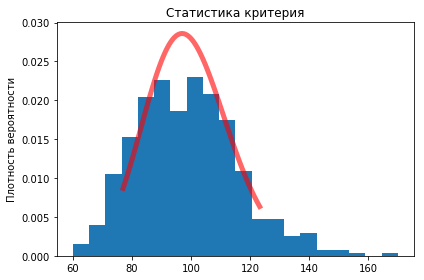

In [11]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(criteria, 20, normed=True)

# plot
x = np.linspace(chi2_test_dist.ppf(0.05, n2 - 1), chi2_test_dist.ppf(0.95, n2 - 1), 100)
ax.plot(x, chi2_test_dist.pdf(x, n2 - 1), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("Статистика критерия")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

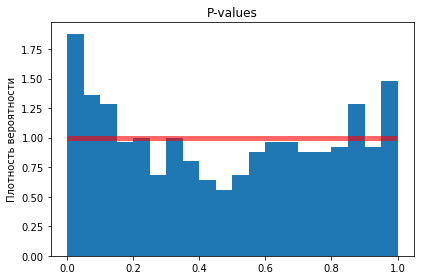

In [12]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(p_values, 20, normed=True)

# plot
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("P-values")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()